In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 355 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [67]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\kumar\AppData\Local\Temp\ipykernel_4968\2724883676.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
12/12 [==============================] - 44s 4s/step - loss: 0.5672 - accuracy: 0.7775 - val_loss: 0.8909 - val_accuracy: 0.6724
Epoch 2/10
12/12 [==============================] - 48s 4s/step - loss: 0.8543 - accuracy: 0.7042 - val_loss: 1.2815 - val_accuracy: 0.5172
Epoch 3/10
12/12 [==============================] - 48s 4s/step - loss: 0.6539 - accuracy: 0.7099 - val_loss: 0.7424 - val_accuracy: 0.7414
Epoch 4/10
12/12 [==============================] - 49s 4s/step - loss: 0.4874 - accuracy: 0.8000 - val_loss: 1.6730 - val_accuracy: 0.5172
Epoch 5/10
12/12 [==============================] - 48s 4s/step - loss: 0.4518 - accuracy: 0.8225 - val_loss: 0.7165 - val_accuracy: 0.7069
Epoch 6/10
12/12 [==============================] - 48s 4s/step - loss: 0.5698 - accuracy: 0.7803 - val_loss: 0.7173 - val_accuracy: 0.7241
Epoch 7/10
12/12 [==============================] - 47s 4s/step - loss: 0.4745 - accuracy: 0.7944 - val_loss: 1.0253 - val_accuracy: 0.5517
Epoch 8/10
12/12 [==

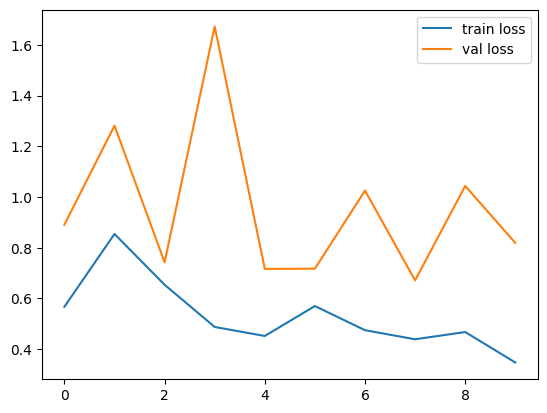

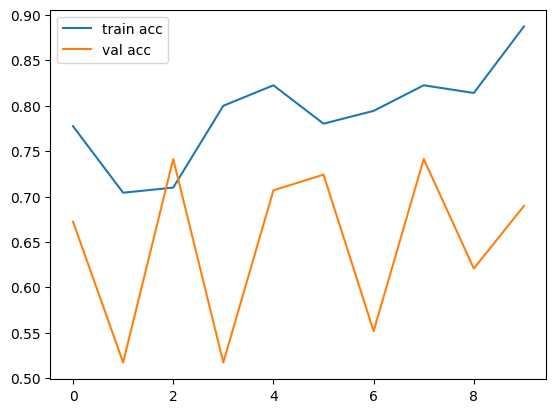

<Figure size 640x480 with 0 Axes>

In [68]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [69]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [70]:

y_pred = model.predict(test_set)


2/2 [==============================] - 6s 2s/step


In [71]:
y_pred

array([[5.32279839e-04, 9.99414921e-01, 5.28030068e-05],
       [1.44519493e-01, 4.79159579e-02, 8.07564616e-01],
       [1.06744245e-02, 8.74606013e-01, 1.14719518e-01],
       [1.86787680e-01, 1.16988398e-01, 6.96223855e-01],
       [9.48803842e-01, 4.24198370e-04, 5.07719852e-02],
       [8.10294151e-01, 1.50211398e-02, 1.74684778e-01],
       [1.94754526e-02, 4.27613361e-03, 9.76248443e-01],
       [1.91701334e-02, 5.85737884e-01, 3.95091891e-01],
       [8.66048157e-01, 6.62682876e-02, 6.76835701e-02],
       [1.16195511e-02, 1.35946810e-01, 8.52433681e-01],
       [7.81171548e-04, 4.08720113e-02, 9.58346784e-01],
       [3.12145334e-03, 6.75860763e-01, 3.21017772e-01],
       [1.14903733e-01, 1.61921512e-02, 8.68904114e-01],
       [5.39571583e-01, 2.02936009e-01, 2.57492423e-01],
       [9.83212888e-01, 6.50103297e-03, 1.02861030e-02],
       [1.87460834e-03, 9.76998091e-01, 2.11273227e-02],
       [6.15597606e-01, 5.37331775e-02, 3.30669165e-01],
       [6.92903161e-01, 1.58524

In [72]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [73]:
y_pred

array([1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2,
       0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0], dtype=int64)

In [74]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [75]:
model=load_model('model_resnet50.h5')

In [76]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.25665 , -116.04175 , -122.91921 ],
         [-103.16645 , -115.95939 , -122.83686 ],
         [-103.06449 , -115.85743 , -122.7349  ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.025276, -115.818214, -122.71137 ],
         [-103.025276, -115.82998 , -122.719215],
         [-103.0292  , -115.8339  , -122.72314 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.993904, -115.80645 , -122.719215],
         [-102.96645 , -115.79861 , -122.72314 ],
         [-102.96645 , -115.79861 , -122.72314 ]],

        ...,

        [[-103.04096 , -115.97115 , -1

In [77]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [78]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [79]:
x.shape

(224, 224, 3)

In [80]:
x=x/255

In [81]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [82]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.09205106, 0.8157217 , 0.09222729]], dtype=float32)

In [83]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 201ms/step


In [84]:
a==1

array([ True])

In [85]:
def predict_Car(path):
    img = image.load_img(path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()  # Display the image

    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)

    # Make a single prediction
    predictions = model.predict(img_data)
    predicted_class = np.argmax(predictions, axis=1)
    print('_________________')
    if predicted_class == 0:
        return 'This is Audi'
    elif predicted_class == 1:
        return 'This is Lamborghini'
    else:
        return 'This is Mercedes'


# # Visualizing the results

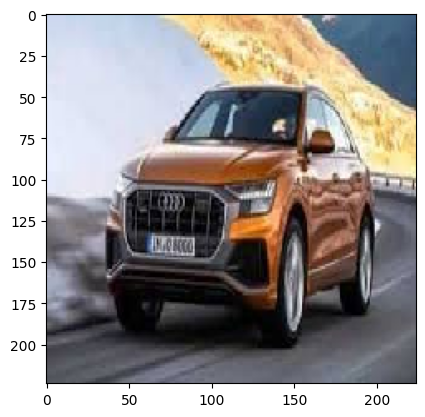

1/1 [==============================] - 0s 136ms/step
_________________


'This is Audi'

In [93]:
predict_Car('Datasets/Test/audi/28.jpg')

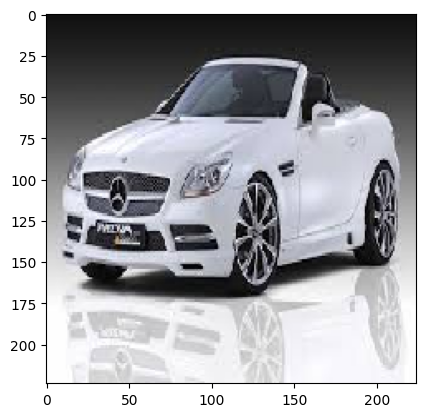

1/1 [==============================] - 0s 110ms/step
_________________


'This is Mercedes'

In [87]:
predict_Car('Datasets/Test/mercedes/30.jpg')

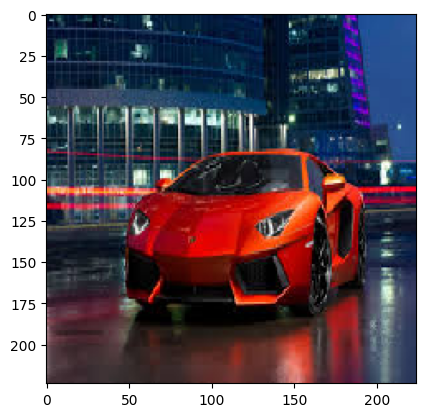

1/1 [==============================] - 0s 137ms/step
_________________


'This is Lamborghini'

In [94]:
predict_Car('Datasets/Test/lamborghini/30.jpg')